In [1]:
import os
import sys
root_path = os.path.abspath("../../../")
if root_path not in sys.path:
    sys.path.append(root_path)

from Util.Util import DataUtil

x_train, y_train = DataUtil.gen_spiral(size=100, one_hot=False)
x_cv, y_cv = DataUtil.gen_spiral(size=10, one_hot=False)

In [2]:
from NN import Basic

nn = Basic(x_train, y_train, x_cv, y_cv).fit(snapshot_ratio=0)

Epoch   32   Iter 1119   Snapshot   32 (acc)  -  Train :      1.0   CV :      1.0  -  Time Cost: 4.936583042144775


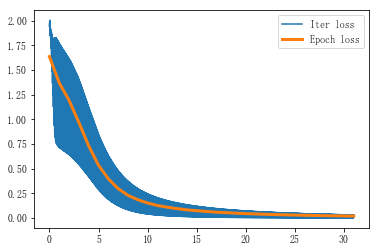

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

el, il = nn.log["epoch_loss"], nn.log["iter_loss"]
ee_base = np.arange(len(el))
ie_base = np.linspace(0, len(el) - 1, len(il))
plt.figure()
plt.plot(ie_base, il, label="Iter loss")
plt.plot(ee_base, el, linewidth=3, label="Epoch loss")
plt.legend()
plt.show()